# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [ ]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [ ]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 73688.89it/s]


## Визуализация модели

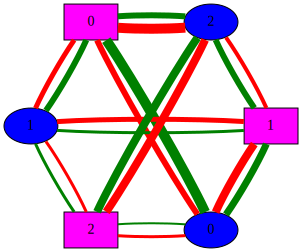

In [ ]:
model.plot_graph(100, 200)

## Результаты моделирования

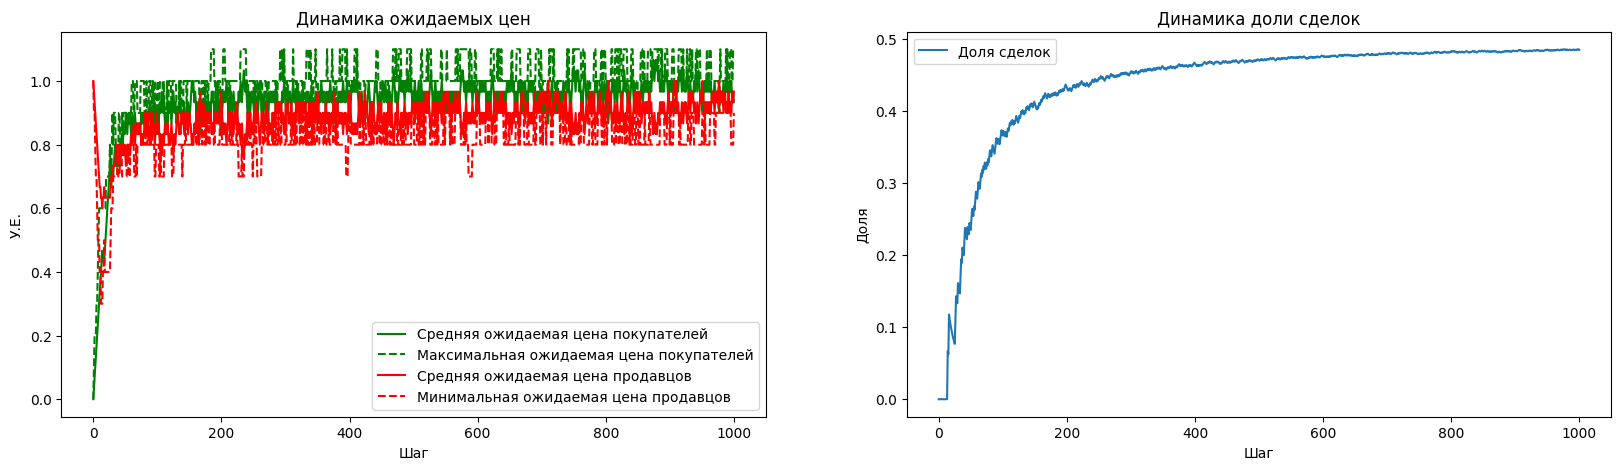

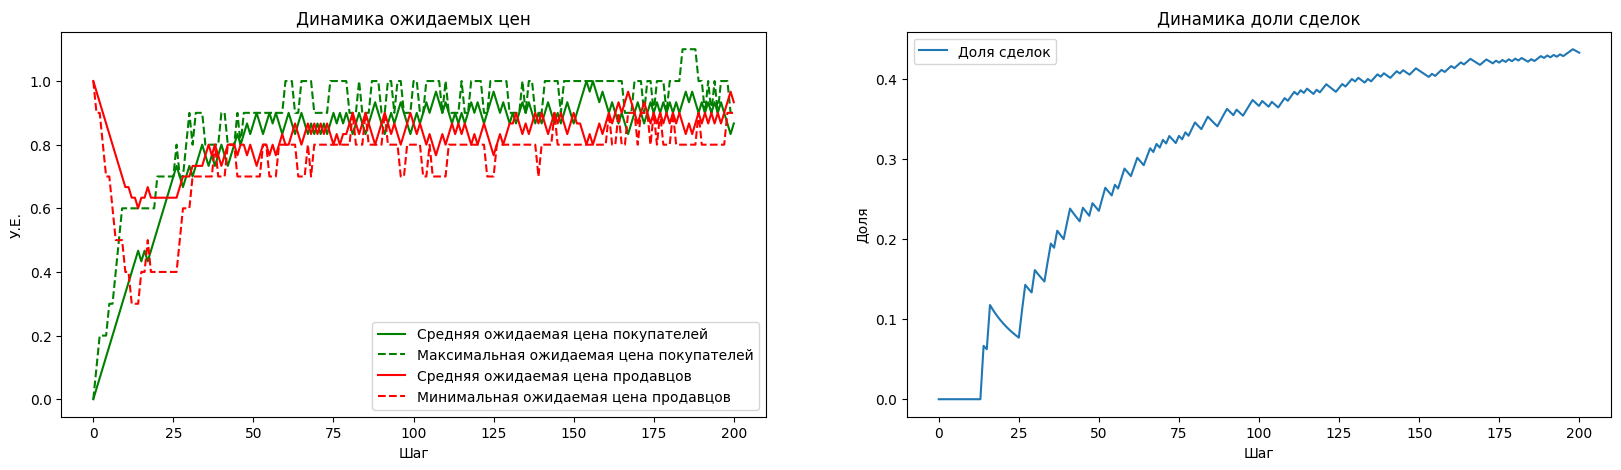

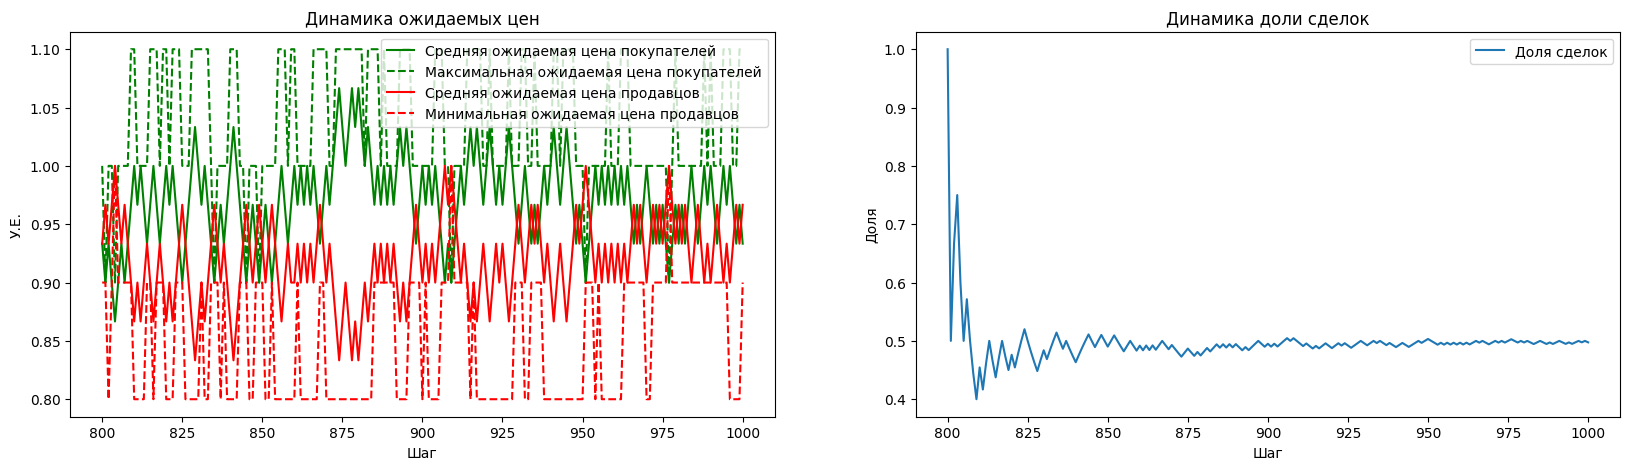

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

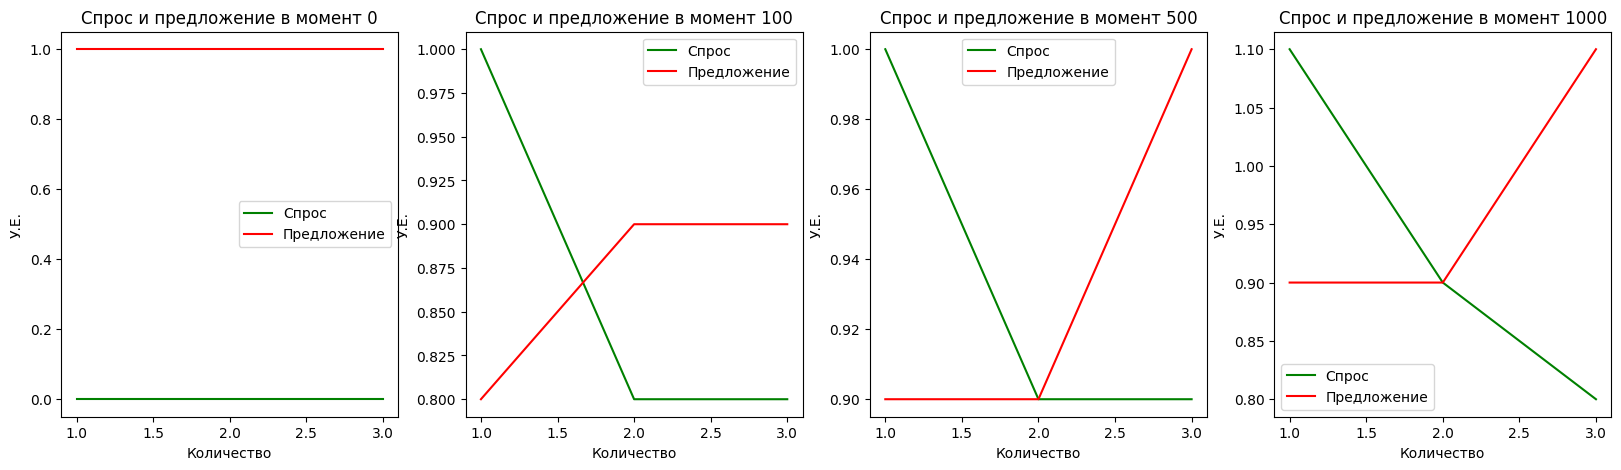

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень.
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

Во-первых, количество удачных сделок возрастает при увеличении количества покупателей и продавцов , так как количество потенциальных пар покупатель-продавец увеличивается. Это мы можем увидеть при изменении параметров num_of_consumers, num_of_sellers. Так, например, при num_of_consumers = 7, num_of_sellers = 7 зеленых линий-связей (то есть удачных сделок) становится больше.


100%|██████████| 1001/1001 [00:00<00:00, 86142.48it/s]


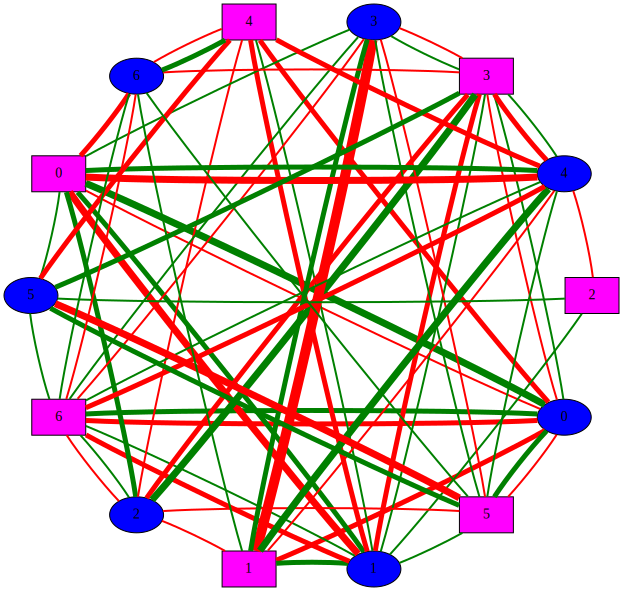

In [ ]:
random.seed(42)
model = Model(num_of_consumers=7,
              num_of_sellers=7,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)
model.plot_graph(100, 200)

Теперь, когда мы обнаружили, что количество удачных сделок прямо зависит от количества продавцов и покупателей на рынке, мы можем ответить на вопрос ((3)- Скорости сходимости зависят от количества продавцов и покупателей и шага цены.) Так, например, если шаг цены достаточно большой, то скорость сходимости может уменьшиться (при заданном параметре delta), то есть если диапазон расхождения ожидаемых цен у продавцов и покупателей большой, то чтобы совершить удачную сделку, то есть прийти к приблизительно равновесной цене необходимо сделать много неудачных сделок, тогда установленные цены будут изменяться на величину параметра delta. Именно поэтому выше я указала парметр delta в скобках, так как если он достатончо большой или наоборот маленький относительно взятого интервала цен, то корреляция в ценах будет черес-чур большой/маленькой, что в свою очередь замедлит скорость сходимости.



Во-вторых, теперь мы можем ответить на вопрос (2 - Доля сделок выходит на некоторый постоянный уровень). Статистика показывает, что вначале продавцы устанавливают максимально возможную цену, стремлясь максимизировать свою прибыли, тогда как покупатели в момент 0 устанавливают минимально возможную цену, стремлясь минимизировать издержки. по мере того, как цена коррелируется, стремлясь достигнуть равновесия, она изменяется на величину параметра дельта. На опредленный уровень доля сделок выходит когда цена приблизительно равна равновесной, она может оклоняться на величину дельта.


Очевидно, что в связи с тем, что изначально у продавца expected_price = seller_max, а у покупателя expected price = consumer_min. То разрыв между желаемыми ценами продавца и покупателя достаточно велик, поэтому вначале диаграмма связей содержит много красных связей, которые сведетельствуют о неудачных сделках, которые необходимо совершать в процессе корреляции цены. По мере того, как участники модели адаптируются к реальным ценам, то есть приближаются к равносвесной цене, количество красных связей уменьшается, а зеленые связи (- успешные сделки) становятся более сильными, что означает большее количество удачных сделок. После достижения равновесия диаграмма связей стабилизируется на определенном уровне, и количество красных и зеленых связей не изменяется. Это ответ на (пункт 4 - Опишите характеристики изменений диаграмм связей со временем). Таким образом, чем боле времени прошло с момента начала сделок, тем больше зеленых линий проявляется на диаграмме связей.



(1-Ожидаемые цены попадают в некоторый интервал.)
При достижении равновесия, ожидаемые цены начинают варьироваться в некотором интерале, это происходит потому, что не все покупатели и продавцы одновременно приходят к равновесной цене => эти цены колеблются на дельта. При больших значениях например на промежутке от 0 до 1000 колебания доли сделок почти не заметны, они похожи на прямую линию, однако при более точном рассмотрении- на меньшем промежутке, например от 0 до 500 эти колебания отчетливо видно.Также важно отметить, что если минимальная цена продавца будет выше максимальной цены покупателя, то сделка не состоится.

Динамика доли сделок на промежутке от 0 до 1000. Колебания практически не заметны

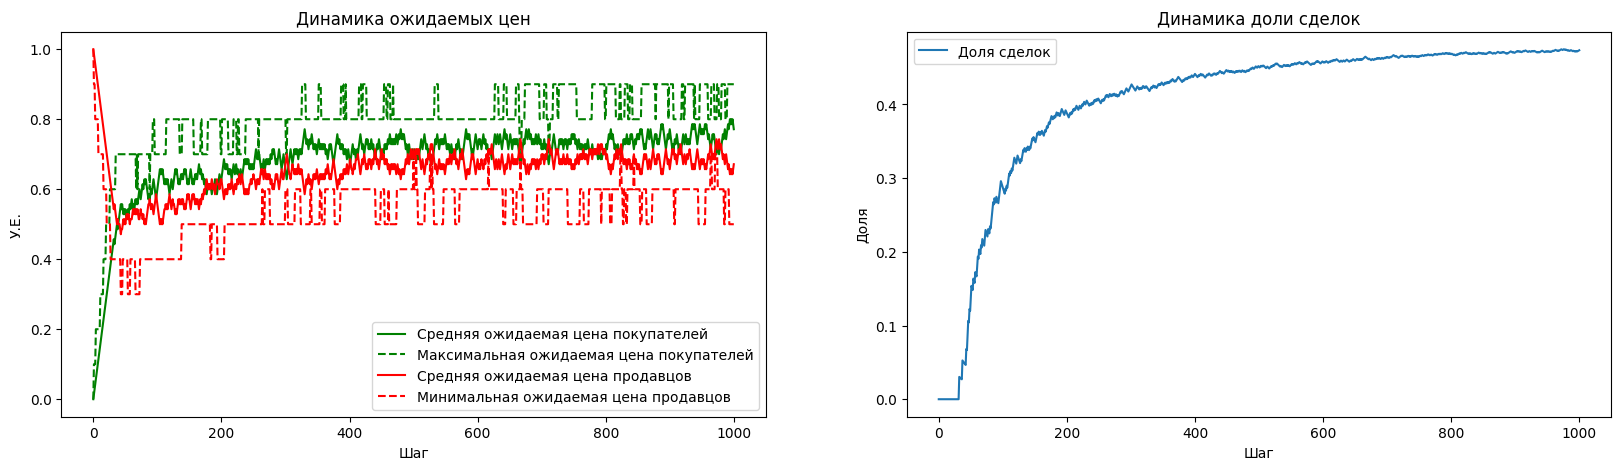

In [ ]:
model.plot_dynamics(0, 1000)

Динамика доли сделок на промежутке от 0 до 500. Колебания отчетливо видны

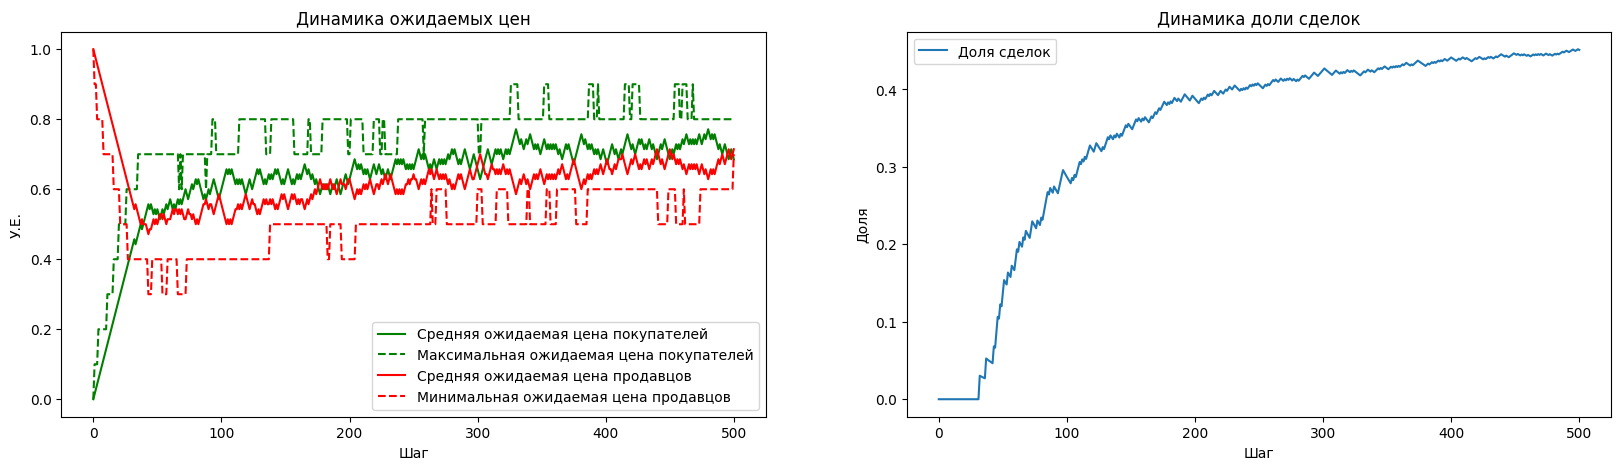

In [ ]:
model.plot_dynamics(0, 500)

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [ ]:
# 2. Генерация разных групп покупателей и продавцов.
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, seller_min, seller_max):
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # сгенерируем случайное число (k) в группе продавцов и покупателей
        consumers_1num = random.randint(0, num_of_consumers)
        consumers_2num = num_of_consumers - consumers_1num

        sellers_1num = random.randint(0, num_of_sellers)
        sellers_2num = num_of_sellers - sellers_1num

        # сгенерируем параметр дельта для продавцов и покупателей из группы 1
        self.consumer_delta_1 = random.uniform(consumer_min, consumer_max)
        self.seller_delta_1 =  random.uniform(seller_min, seller_max)


        # Список всех продавцов и покупателей модели в группе 1
        self.consumers_1 = [Consumer(consumer_min, consumer_max, self.consumer_delta_1) for _ in range(consumers_1num)]
        self.sellers_1 = [Seller(seller_min, seller_max, self.seller_delta_1) for _ in range(sellers_1num)]

        # сгенерируем параметр дельта для продавцов и покупателей из группы 2
        self.consumer_delta_2 = 0.1 * random.randint(consumer_min, consumer_max)
        self.seller_delta_2 =  0.1 * random.randint(seller_min, seller_max)

        # Список всех продавцов и покупателей модели в группе 2
        self.consumers_2 = [Consumer(consumer_min, consumer_max, self.consumer_delta_1) for _ in range(consumers_2num)]
        self.sellers_2 = [Seller(seller_min, seller_max, self.seller_delta_1) for _ in range(sellers_2num)]

        # сольем массивы consumers = consumers_1 + consumers_2, sellers = sellers_1 + sellers_2
        self.consumers = self.consumers_1 + self.consumers_2
        self.sellers = self.sellers_1 + self.sellers_2


        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


Я буду генерировать две группы продавцов с разными дельта, также две группы покупателей с разными дельта.
Изменим базовую модель, теперь параметр delta генерируется случайным образом в диапазоне [seller_min, seller_max],[consumer_min, consumer_max] с помощью функции random.uniform() — возвращает псевдослучайное вещественное число в диапазоне от <Начало> до <Конец>.
Предположим, что всего у нас было n покупателей, тогда k из них будет в первой  группе (consumers_1num) с заданным параметром delta, а остальные n-k будут во второй группе (consumers_2num)с другим параметром дельта. Аналогично для seller_1num и seller_2num. class Seller и class Consumer остались неизменными. Затем я генерирую список продавцов длины consumers_1num с параметром delta_1, аналогично для consumers_2num, аналогично для seller. Потом массивы сливаются в итоговые self.sellers и self.consumers, для того, чтобы получить единые массивы.

Получается теперь при генерации дочернего экземпляра базовой модели по параметрам не передается дельта, так как она независимо генерируется внутри базовой модели

100%|██████████| 1001/1001 [00:00<00:00, 82595.58it/s]


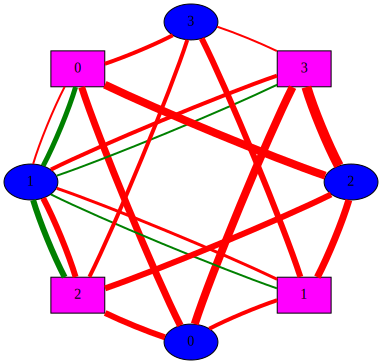

In [ ]:
# пример
random.seed(42)
model = Model(num_of_consumers=4,
              num_of_sellers=4,
              consumer_min=3,
              consumer_max=4,
              seller_min=0,
              seller_max=1)
model.run(1000)
model.plot_graph(100, 200)

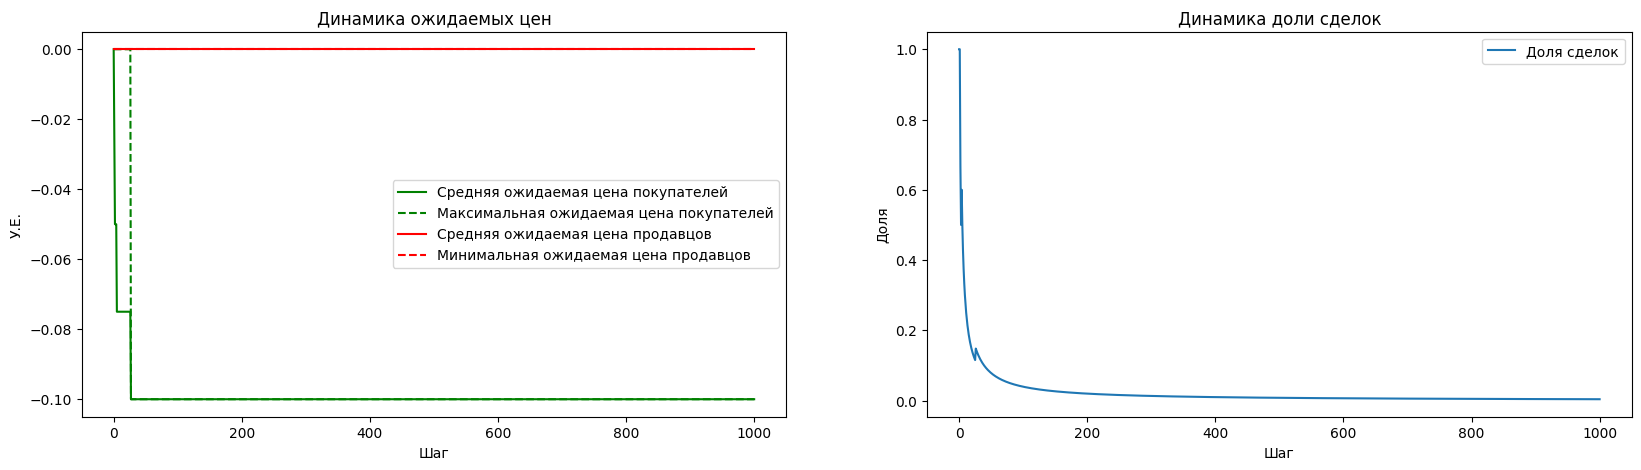

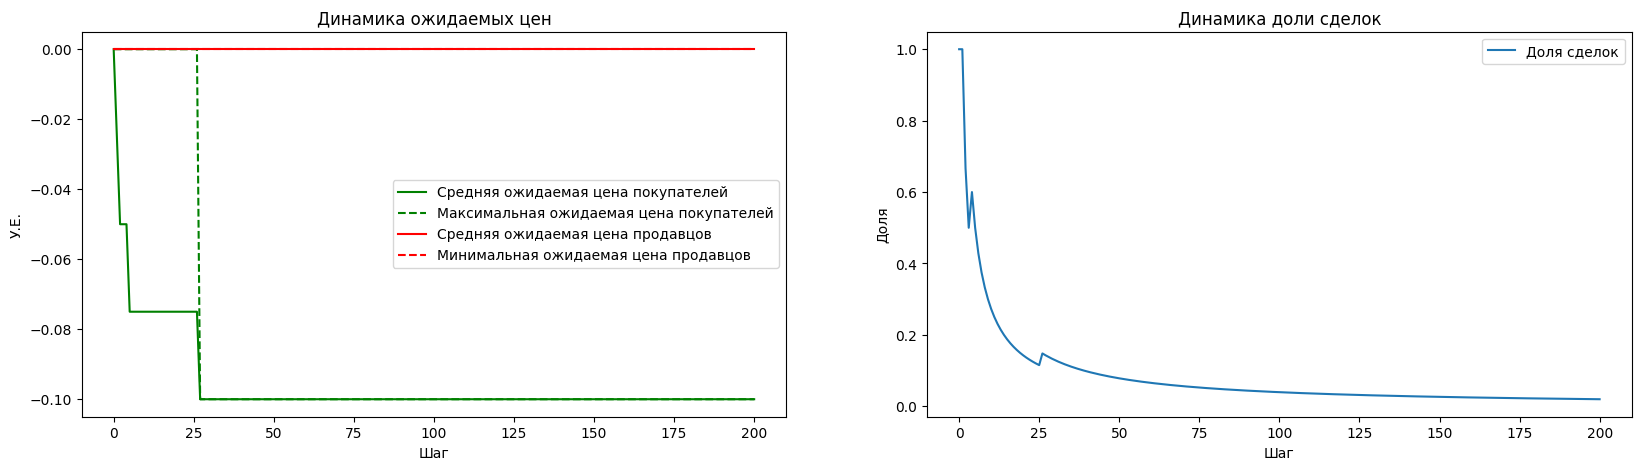

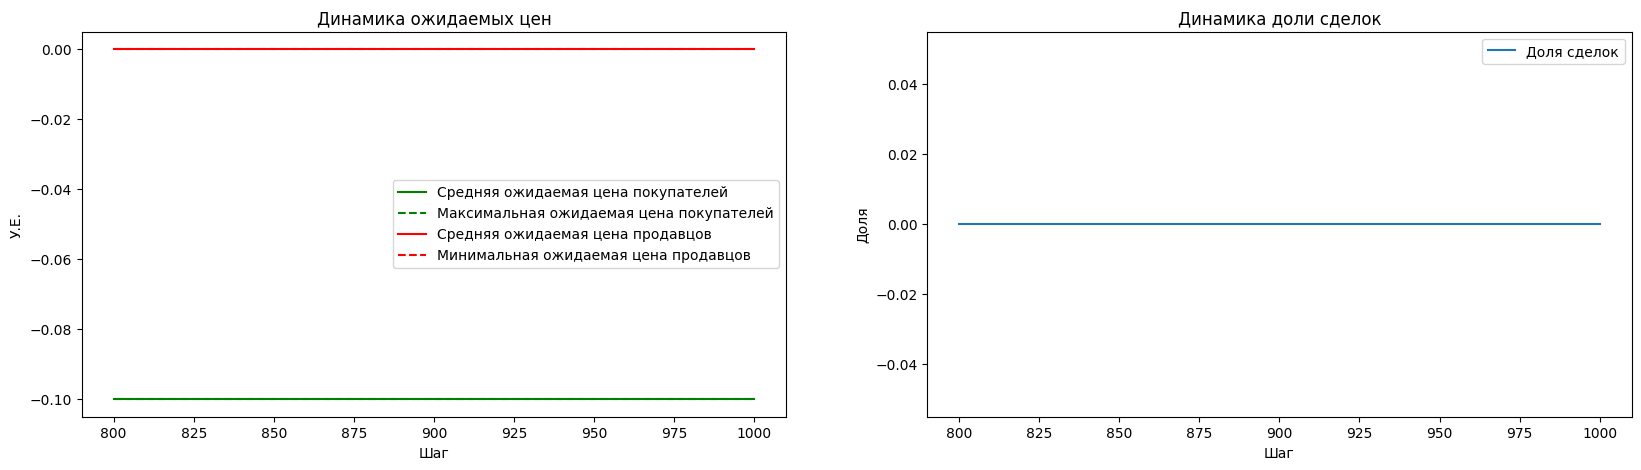

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

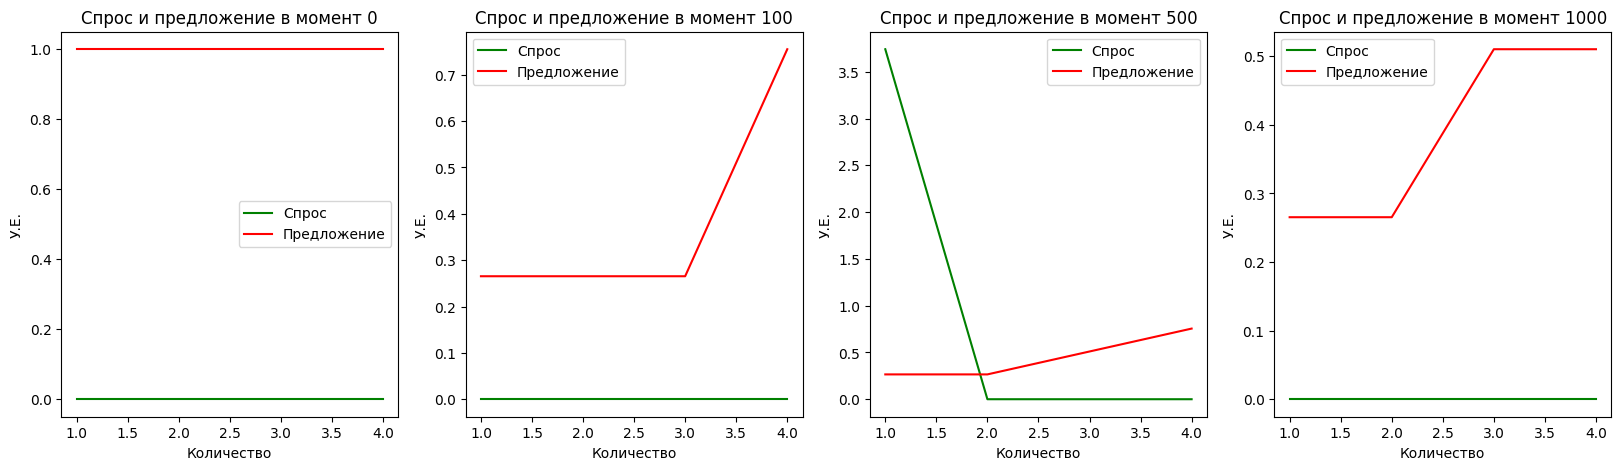

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день.
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

пункт 4

In [ ]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections


        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех продавцов модели
        # при создании параметра num_of_goods генерируем случайное число [0, 10^6) -
        # максимальное количество товаров, которое может продать отдельный продавец
        self.sellers = [Seller(seller_min, seller_max, seller_delta, num_of_goods = random.randrange(pow(10,6))) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price and self.sellers[seller_id].num_of_goods > 0: # Сделка состоялась
            # проверяем, что у отдельного продавца количество товаров, которые он может продать > 0 (self.sellers[seller_id].num_of_goods > 0)
            # , иначе, даже если продавец и покупатель сошлись в цене, сделка не может состояться
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            self.sellers[seller_id].increase_expect_price()  # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_num_of_goods()  # Данный продавец продал 1 товар

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, days):
      # теперь функция run принимает параметр days (количество дней), который отвечает за количество рассматриваемых дней
      # когда количество взаимодействий достигает max_connection, то день заканчивается и начинается новый
        for _ in range(days + 1):
          for i in trange(self.max_connections): # trange вместо range для визуализации прогресс-бара
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)
          for j in range(0, self.num_of_sellers): # если количество взаимодействий достигает max_connection, то день заканчивается и начинается новый, это значит, что независимо от того
            self.sellers[j].num_of_goods = 0. # остались ли у продавца товары, они обнуляются


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, num_of_goods):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.num_of_goods = num_of_goods

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

    def decrease_num_of_goods(self):
        self.num_of_goods -= 1



В этой модели я рассматривала достаточно много аспектов. Начнем с 1-ого, теперь max-connections (отвечает за количество связей продавец-покупатель в день, когда итератор доходит до max-connections день заканчивается) является полем класса Model, и передается в качестве аргумента. Так как у меня в задании число максимально возможных товаров, которые может продать продавец устанавливается случайным образом, я, при создании дочернего обекта class seller, выполняю num_of_goods = random.randrange(pow(10,6)). Этот параметр является полем класса селлер.

Далее перейдем к функции run, по параметру она примает теперь количество дней, в ней еть два цикла for, один проходится по заданным количествам дней, другой по связям продавец-покупатель в течение дня. если итератор достиг max-connectuions, то по условию все непроданные товары сгорают, то есть обнуляются. Функция run вызывает функцию deal.

Рассмотрим функцию deal: будем считать, что сделка состоялась, не только если продавец и покупатель сошлись в цене, но и если у продавца не ноль товаров, которые он может продать (and self.sellers[seller_id].num_of_goods > 0). Если сделка состоялась, то помимо корреляции цены на величину дельта количество товаров у продавца уменьшается за счет функции .decrease_num_of_goods() , которая является методом class Seller.

100%|██████████| 1000/1000 [00:00<00:00, 129027.72it/s]


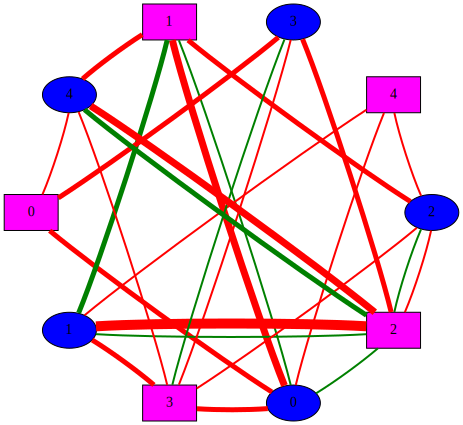

In [ ]:
# пример
random.seed(42)
model = Model(num_of_consumers=5,
              num_of_sellers=5,
              consumer_min=10,
              consumer_max=60,
              consumer_delta=2,
              seller_min=0,
              seller_max=20,
              seller_delta=2,
              max_connections=1000)
model.run(4) # теперь здесь количество дней
model.plot_graph(0, 40)

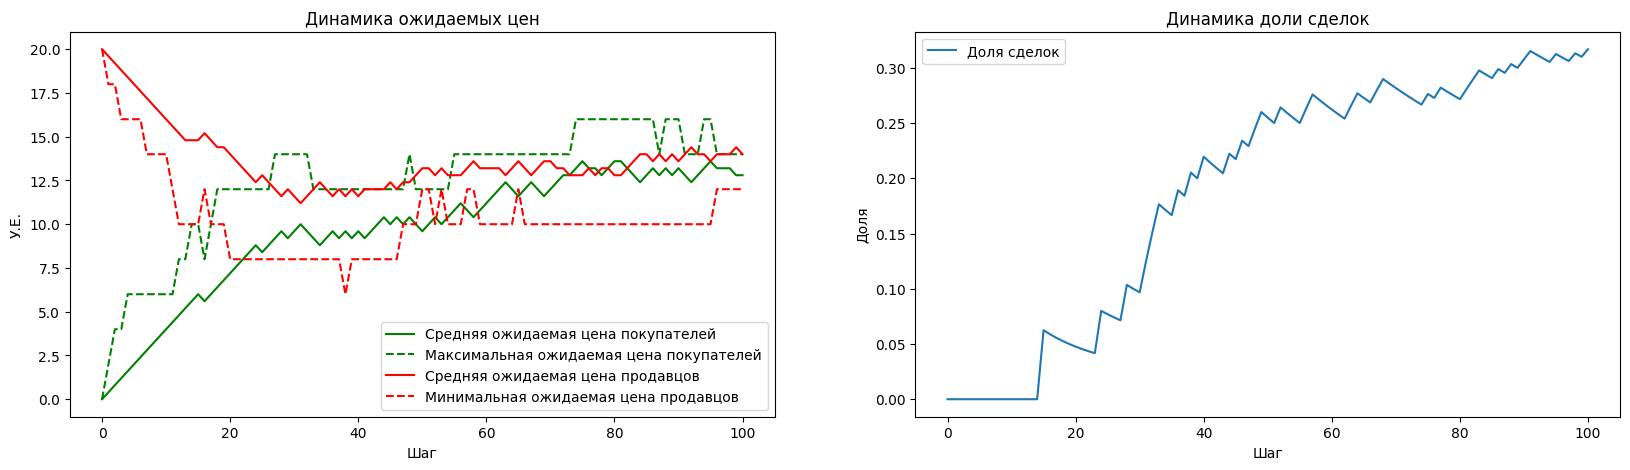

In [ ]:
model.plot_dynamics(0, 100)

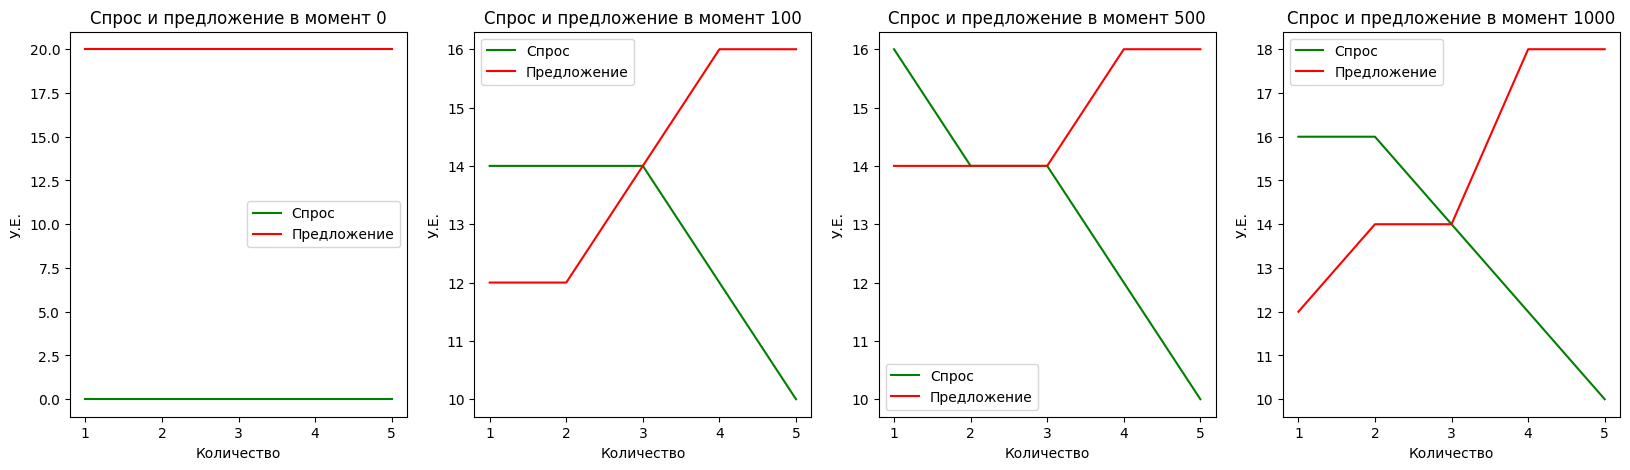

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

<!-- пункт 4 -->


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

In [ ]:
# пусть мы рассматриваем сх отрасль, тогда пусть с равной вероятностью у нас может произойти неурожай (плохое состояние мира-0)
# или избыток урожая (хорошее состояние мира-1).
# Тогда, если происходит событие 1, то продавец устанавливает скидку для того чтобы прийти к равноценной цене,
# а если происходит событие 0, то вмешивается государство искусственно устанавливает максимальную цену (цена, выше которой продавать товар нельзя)

def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, parametr):
        self.parametr = parametr
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        if (self.parametr == 1):  # если случился избыток урожая
            self.discount = random.randint(0, 100)  # случайным образом генерируем скидку
            seller_min = seller_min * (1 - self.discount/100)  # минимальная цена уменьшается на скидку
            seller_max = seller_max * (1 - self.discount/100)  # максимальная цена уменьшается на скидку
        elif (self.parametr == 0): # если случился неурожай
            max_probable_price = random.randint(0, seller_max + seller_max // 2) # случайным образом генерируем максимально
            #  возможную цену (пусть она лежит в промежутке от 0 до seller_max + seller_max//2).

            # На этом этапе надо сказать, что max_probable_price, то есть максимальная цена,
            # устанавливаемая государством всегда будет для продавцов expect_price, то есть seller_max.
            # Так как продавцы стремятся максимизировать свою прибыль, то их expect_price в начале торгов всегда будет на максимально возможной оценке,
            # то есть на seller_max

            # таким образом:
            seller_max = max_probable_price

        # передаем max_probable_price в массив, чтобы корректирвать цены при создании class Seller и 46class Consumer
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta, max_probable_price) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta,max_probable_price) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
        Построение и визуализация графа удачных и неудачных сделок
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        '''
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


# осталось убедиться, что в процессе корреляции цены, текущая цена никогда не будет превышать max_price
# для этого в class Consumer и class Seller будем передавать максимально возможную цену (max_probable_price),
# и будем проверять, что в функциях increase() новая цена не будет превышать max_probable_price
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta, max_probable_price):
        self.max_probable_price = max_probable_price
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price and self.max_probable_price: #
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta, max_probable_price):
        self.max_probable_price = max_probable_price
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
      if self.expect_price + self.delta <= self.max_probable_price: #
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



Пусть параметр, отвечающий за состояние мира генерируется случайным образом - random.randint(0,1), где 0 - неурожай, 1 - избыток урожая.

100%|██████████| 1001/1001 [00:00<00:00, 103528.59it/s]


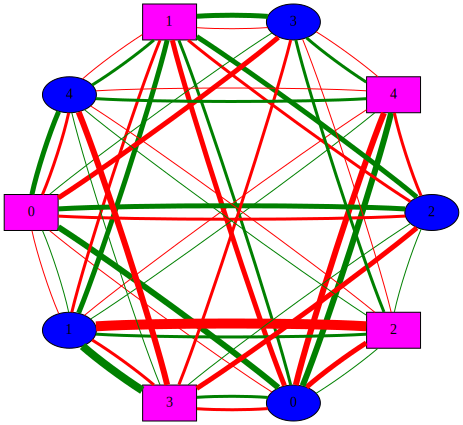

In [ ]:
# пример, когда удачные сделки есть
random.seed(42)
model = Model(num_of_consumers=5,
              num_of_sellers=5,
              consumer_min=20,
              consumer_max=100,
              consumer_delta=1,
              seller_min=20,
              seller_max=100,
              seller_delta=1,
              parametr = random.randint(0,1))
model.run(1000)
model.plot_graph(100, 200)

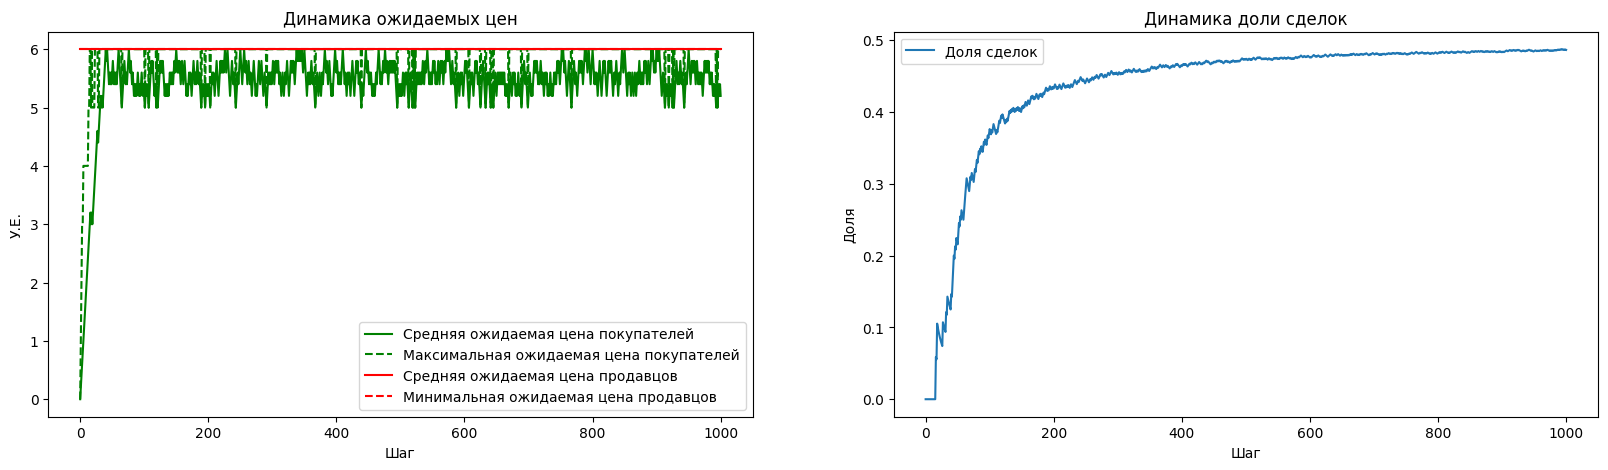

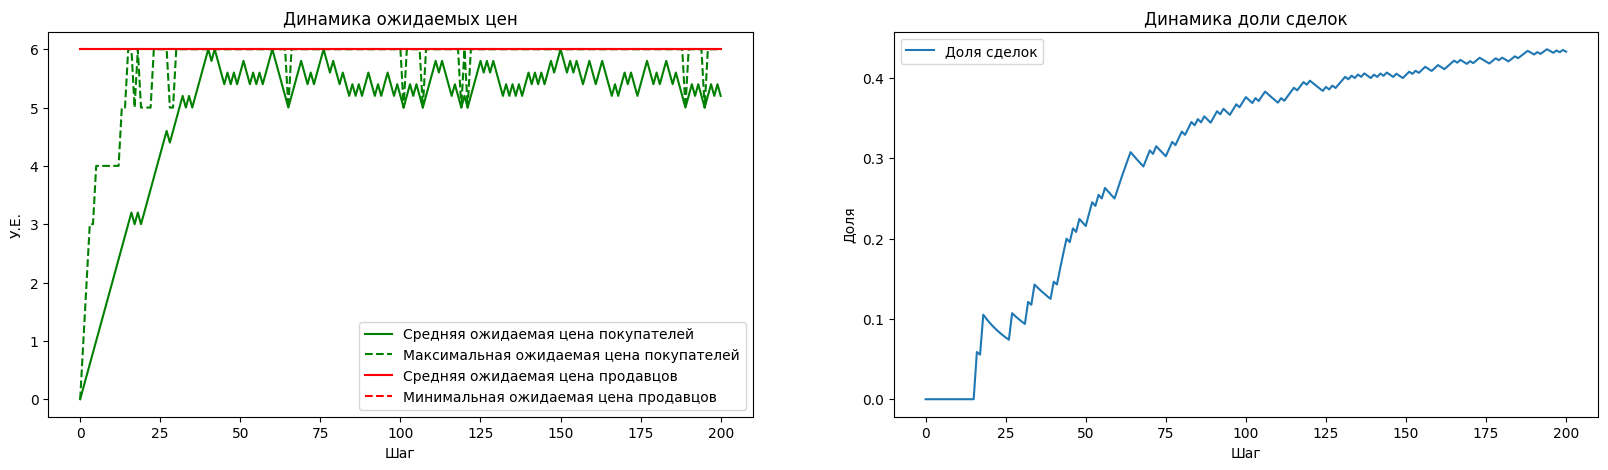

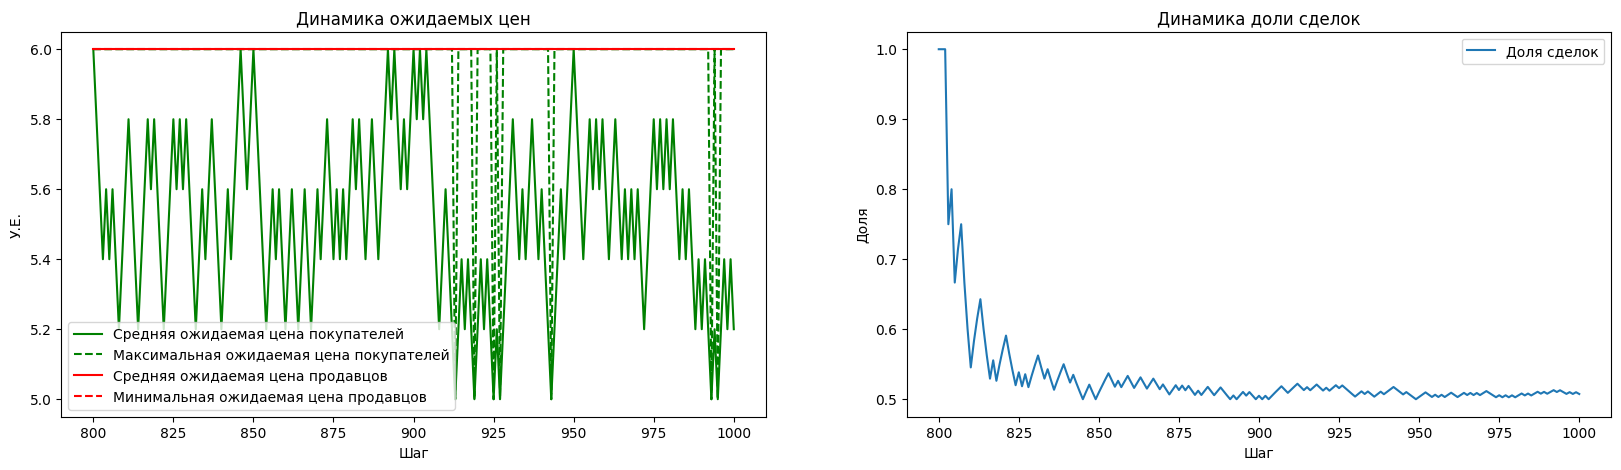

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

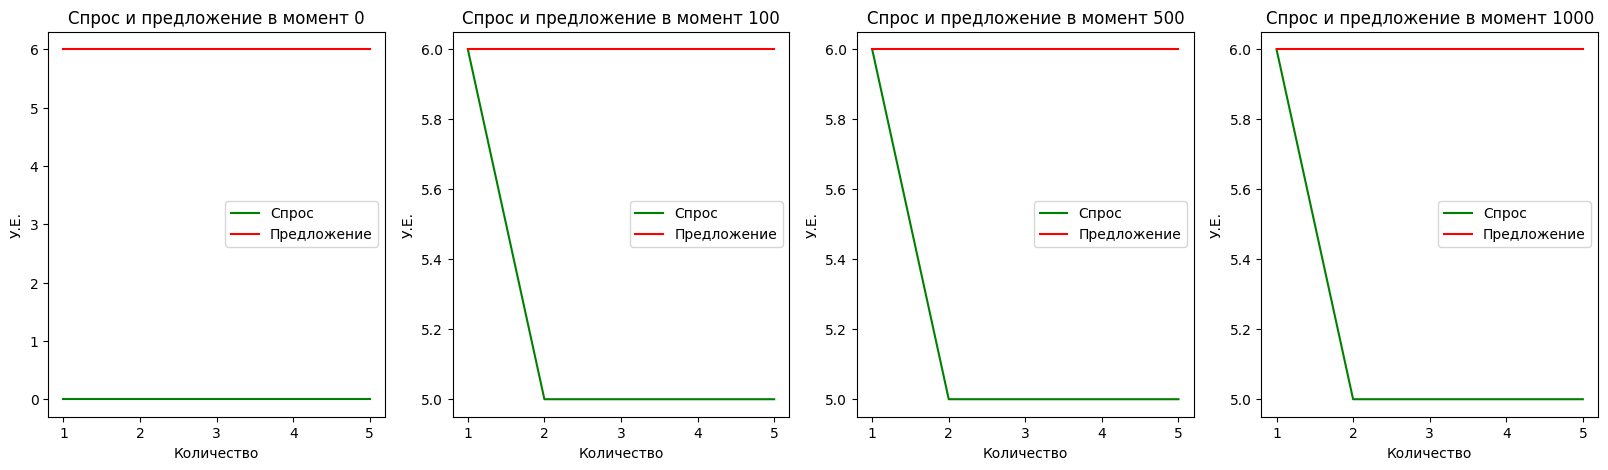

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])

In [ ]:
# пример когда удачных сделок нет
random.seed(45)
model = Model(num_of_consumers=4,
              num_of_sellers=4,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
              parametr = random.randint(0,1))
model.run(1000)
model.plot_graph(100, 200)

AttributeError: ignored

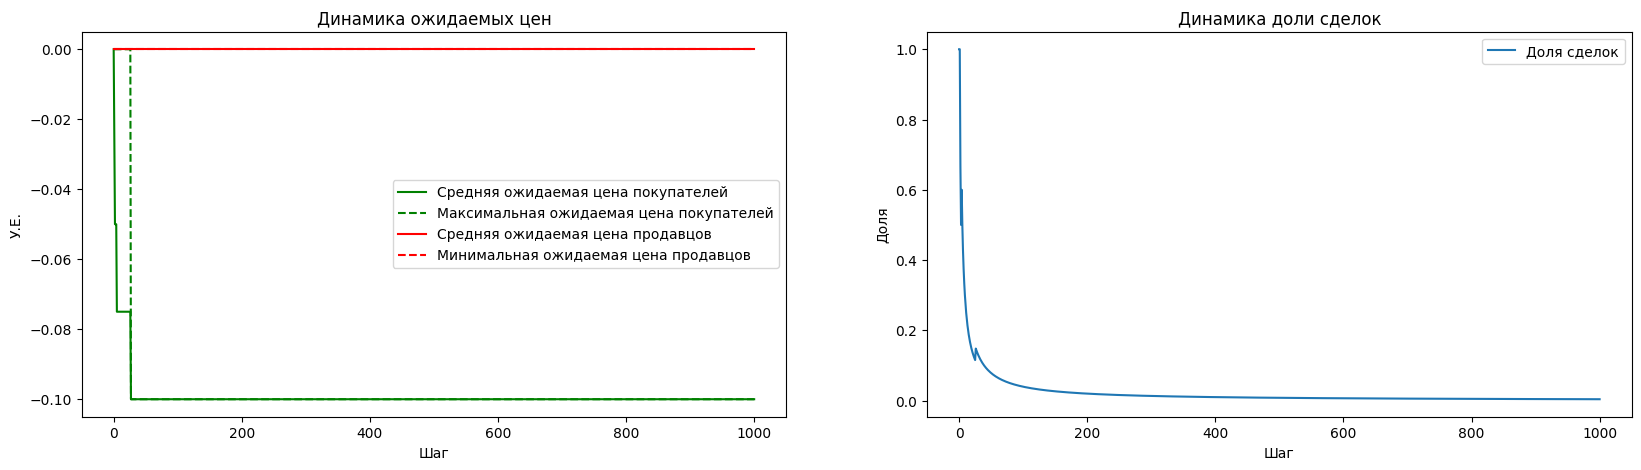

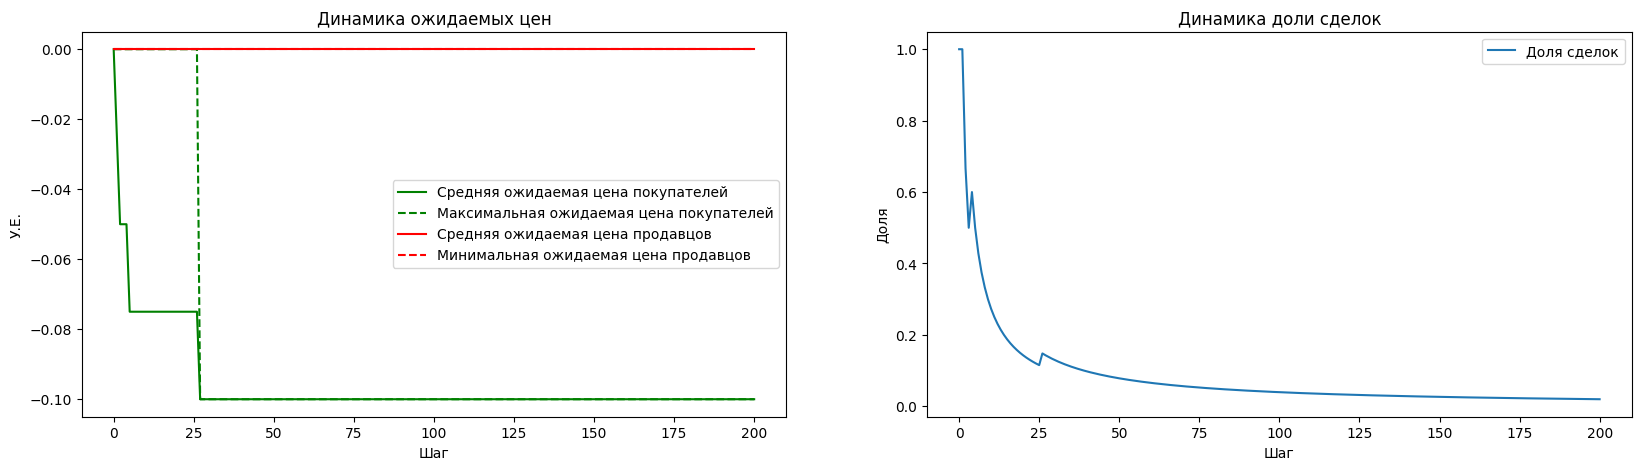

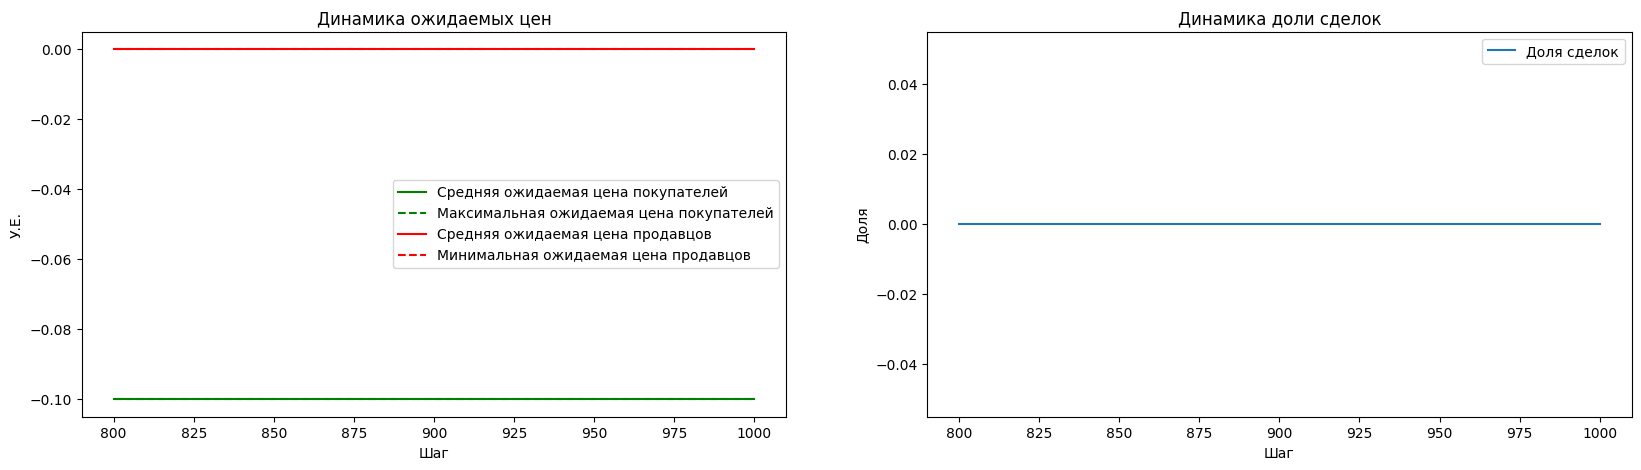

In [ ]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

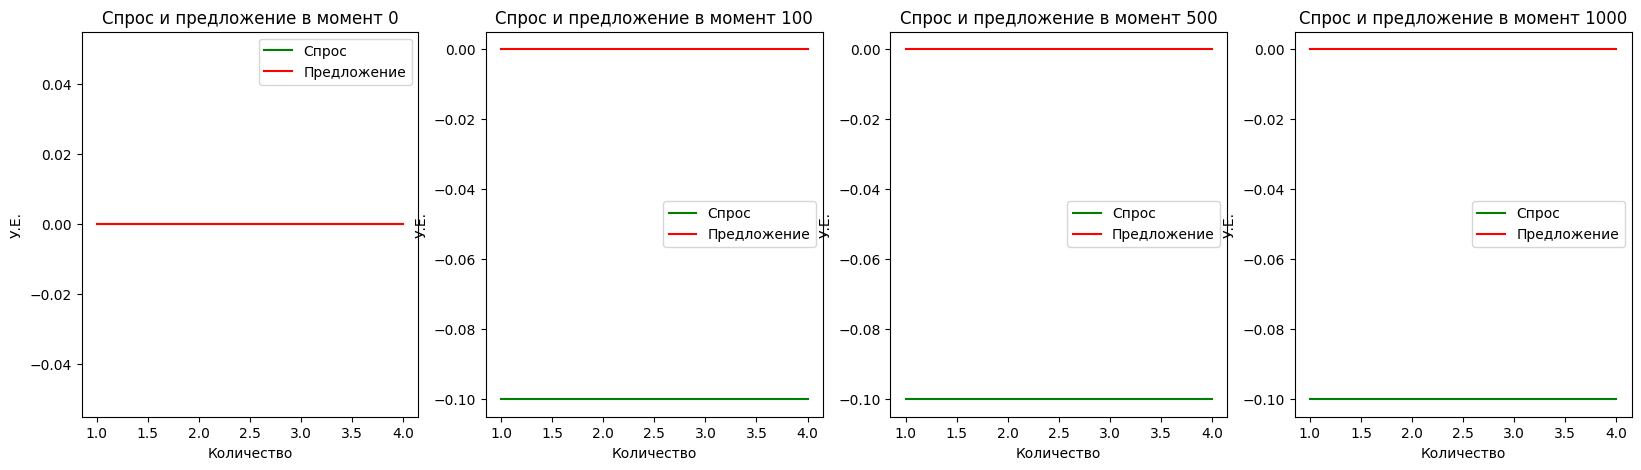

In [ ]:
model.plot_supply_and_demand([0, 100, 500, 1000])